<a href="https://colab.research.google.com/github/Munniz1309/prev_bitcoin_SVR/blob/main/prev_bitcoin_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import yfinance as yf

In [2]:
# Usando o Yahoo Finance para baixar os dados históricos do Bitcoin (BTC-USD)
data = yf.download('BTC-USD', start='2014-01-01', end='2024-11-11')

# Pré-processamento de dados
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
# Normalização dos dados para melhorar a performance do modelo
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [4]:
# Função para criar os dados de entrada e saída
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [5]:
# Definir o número de passos de tempo
time_step = 300

# Criar os dados de treino e teste
X, y = create_dataset(data_scaled, time_step)

# Dividir os dados em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Treinamento do modelo SVR (Support Vector Regression)
model = SVR(kernel='rbf', C=1000, epsilon=0.1)
model.fit(X_train, y_train)

# Previsões com o modelo
predicted_price = model.predict(X_test)

In [6]:
# Inverter a normalização dos dados
predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

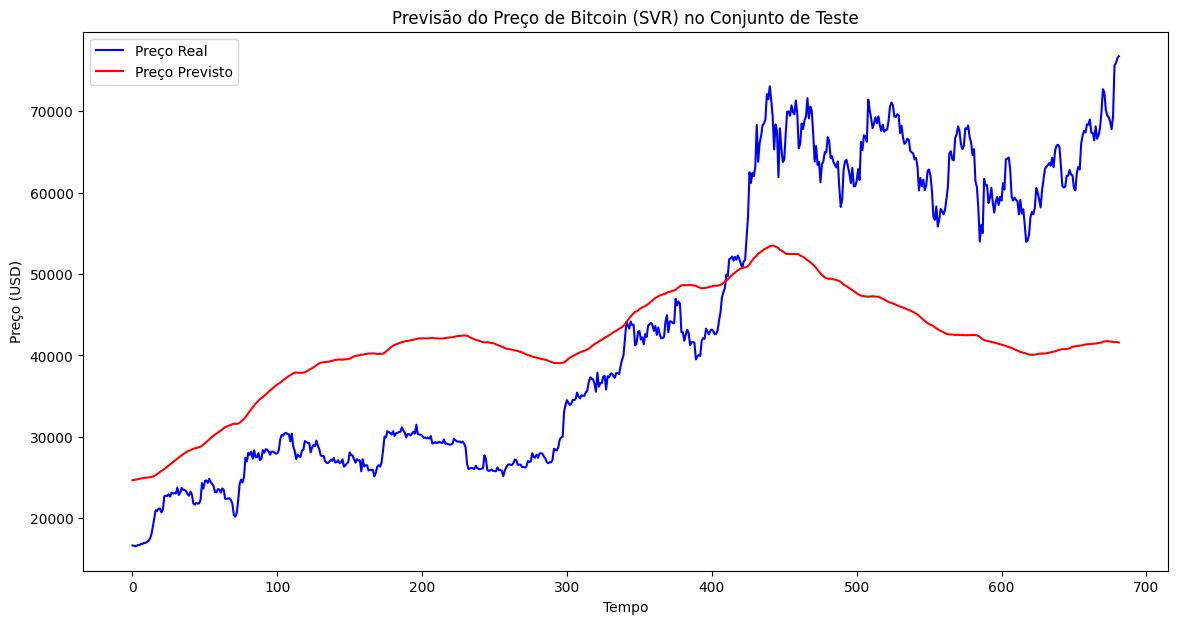

In [7]:
# Visualizar os resultados do conjunto de teste
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Preço Real')
plt.plot(predicted_price, color='red', label='Preço Previsto')
plt.title('Previsão do Preço de Bitcoin (SVR) no Conjunto de Teste')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

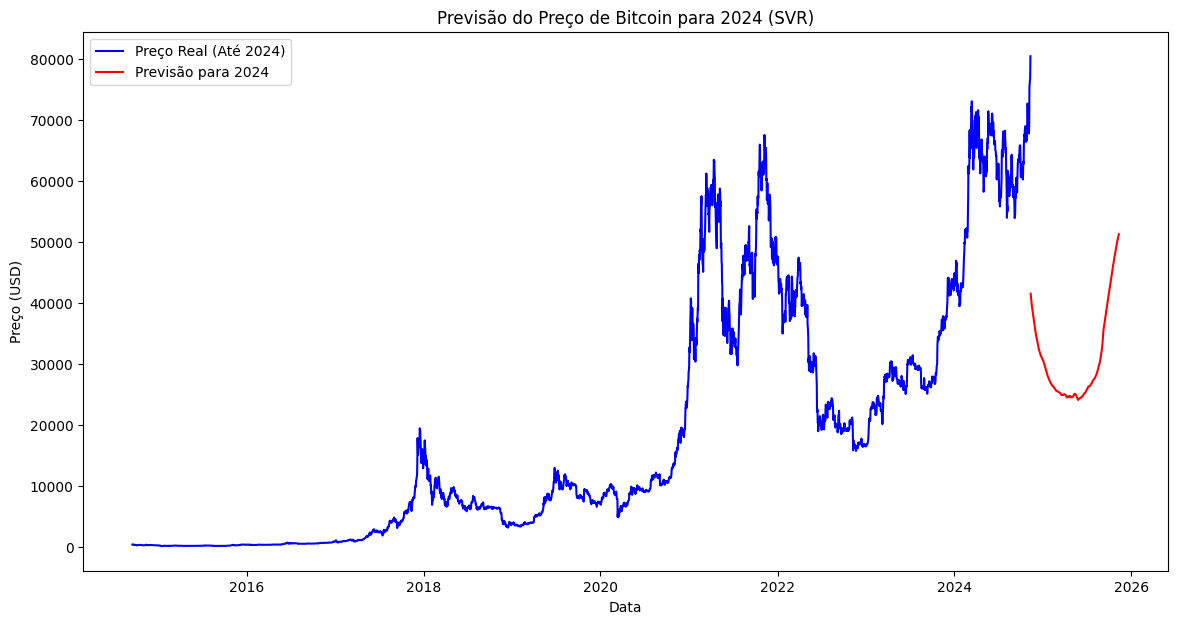

In [9]:
last_sequence = data_scaled[-time_step:]  # Última sequência de dados
predictions_365_days = []

for _ in range(365):  # Prever para os próximos 365 dias (1 ano)
    predicted_value = model.predict(last_sequence.reshape(1, time_step))[0]
    predictions_365_days.append(predicted_value)
    last_sequence = np.append(last_sequence[1:], predicted_value)  # Atualizar a sequência com a previsão

# Inverter a normalização das previsões para obter os valores reais
predictions_365_days = scaler.inverse_transform(np.array(predictions_365_days).reshape(-1, 1))

# Gerar as datas para o ano de 2024
dates_2024 = pd.date_range(start="2024-11-11", periods=365, freq='D')

# Combinar as previsões de 2024 com os dados reais até 2024
historical_dates = data.index
full_dates = historical_dates.append(dates_2024)

# Visualizar o gráfico combinando os preços reais e previstos (para 2024)
plt.figure(figsize=(14, 7))
plt.plot(historical_dates, data['Close'], color='blue', label='Preço Real (Até 2024)')
plt.plot(dates_2024, predictions_365_days, color='red', label='Previsão para 2024')
plt.title('Previsão do Preço de Bitcoin para 2024 (SVR)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()